# Introdução

**Resumo:**

O exemplo aqui desenvolvido tem como objetivo apresentar conceitos iniciais de implementação de redes neurais com python e tensorflow/keras. Esse modelo apresenta um modelo de Rede Neural Convolucional (CNN) básico que pode ser expandido mudando o número de neurônios e camadas. Em adaptações mais avançadas, pode-se estudar possibilidade de otimização de hyperparâmetros e outras técnincas como aumento de dados.

**Não é objetivo nosso desenvolver e otimizar o modelo de classificação**. O exemplo tem objetivo meramente didático.

---

**Para saber mais:**
* [Palestras e cursos do Ocean](http://www.oceanbrasil.com/)
* François Chollet. Deep Learning with Python. Manning Publications, 2017.
* Ian Goodfellow and Yoshua Bengio and Aaron Courville. [Deep Learning](https://www.deeplearningbook.org/). MIT Press, 2016.

# Bibliotecas e Dados

In [1]:
# Bibliotecas necessárias
# Manipulação de dados
import pandas as pd
# Redes Neurais
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
# Avaliação
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Lendo o dataset Kaggle
train = pd.read_csv("../input/digit-recognizer/train.csv")

#Alternativa ler do próprio keras
#(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
# Analisando o dataset
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())

Quantidade de elementos de treino: 42000
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  

In [4]:
# Separando x_train e y_train
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1)
print(X.head())
# Em formato numpy array de imagens 28 x 28
#x = X.values.reshape(-1,28,28,1)
#print(x[0])

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

In [5]:
print(X.shape)

(42000, 784)


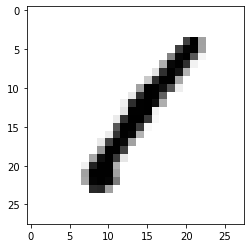

Label: 1


In [6]:
# Numtendi nada!
# Bora ver com matplotlib
plt.imshow(X.values[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Label: {}'.format(Y[0]))

In [7]:
# Transformando a imagem 2d em um numpy array (imagem 28*28)
x = X.values.reshape(42000, 28, 28, 1)

#Normalizando para valores entre 0 e 1
x = x.astype('float32')
x /= 255

#print(x[0])

In [8]:
# Vamos ajustar o formato da saida
num_classes = 10

# Convertendo para um vetor de saida com 10 dimensoes
# ex. 8 => [0,0,0,0,0,0,0,0,1,0]
y = keras.utils.to_categorical(Y, num_classes)
print(y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# Separando uma parte para treino (90%) e outra para validação (10%)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=5)
print('Qtde de treino: {}'.format(len(x_train)))
print('Qtde de validação: {}'.format(len(x_val)))

Qtde de treino: 37800
Qtde de validação: 4200


# Criando e treinando o Modelo

In [1]:
# Criando o modelo Sequential
# Sequential: Modelo Keras de ir adicionando camadas (como um lego)
# Conv2D: Camada com kernels (filtros) que percorrem a imagem extraindo caracterísitcas (mapas de caracteísticas)
# MaxPooling2D: Camada que reduz a dimensionalidade dos mapas de características 2D
# Flatten: Camada que transforma um mapa de características 2D num vetor para classficador final
# Dense: Camada onde todas as entradas estão conectadas em cada neurônio (totalmente conectada)
# Dropout: Camada usa durante treino que descarta aleatoriamente um percentual de conexões (reduz overfitting)

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

NameError: name 'Sequential' is not defined

In [11]:
# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [12]:
# Treina com os parte dos dados
batch_size = 32
epochs = 20

#Salvar o melhor modelo
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks = callbacks_list,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37696/37800 [============================>.] - ETA: 0s - loss: 0.2166 - accuracy: 0.9334
Epoch 00001: val_loss improved from inf to 0.07335, saving model to model.h5
37800/37800 [==============================] - 8s 214us/sample - loss: 0.2163 - accuracy: 0.9335 - val_loss: 0.0734 - val_accuracy: 0.9779
Epoch 2/20
37632/37800 [============================>.] - ETA: 0s - loss: 0.0782 - accuracy: 0.9760
Epoch 00002: val_loss improved from 0.07335 to 0.05859, saving model to model.h5
37800/37800 [==============================] - 4s 115us/sample - loss: 0.0779 - accuracy: 0.9761 - val_loss: 0.0586 - val_accuracy: 0.9836
Epoch 3/20
37568/37800 [============================>.] - ETA: 0s - loss: 0.0561 - accuracy: 0.9841
Epoch 00003: val_loss improved from 0.05859 to 0.04881, saving model to model.h5
37800/37800 [==============================] - 5s 122us/sample - loss: 0.0561 - accuracy: 0.9840 - val_loss: 0.0488 - val_accuracy: 0.

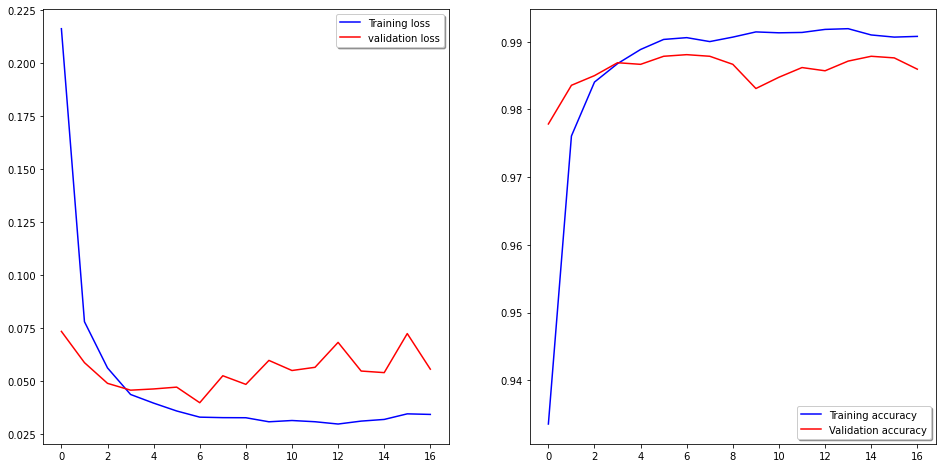

In [13]:
#Vamos ver como foi o treino?

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
from tensorflow.keras.models import load_model
# Load the best saved model
model = load_model('model.h5')

In [15]:
# Testa
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03965903597534634
Test accuracy: 0.9880952


In [16]:
# Testando uma entrada qualquer
print(y_train[10])
print(model.predict(x_train[10].reshape((1,28,28,1))))
print(model.predict_classes(x_train[10].reshape((1,28,28,1))))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[1.7333206e-05 4.1896305e-06 1.9993890e-06 1.9858835e-08 9.9331844e-01
  1.5206568e-07 6.4290497e-03 2.4754656e-06 1.7970895e-04 4.6638550e-05]]
[4]


# Avaliando o Modelo

In [17]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       417
           1       1.00      1.00      1.00       480
           2       0.99      0.98      0.99       408
           3       0.99      0.99      0.99       437
           4       0.99      0.99      0.99       391
           5       0.98      0.98      0.98       377
           6       0.99      1.00      1.00       413
           7       0.99      0.98      0.99       450
           8       0.97      0.98      0.98       381
           9       0.98      0.98      0.98       446

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



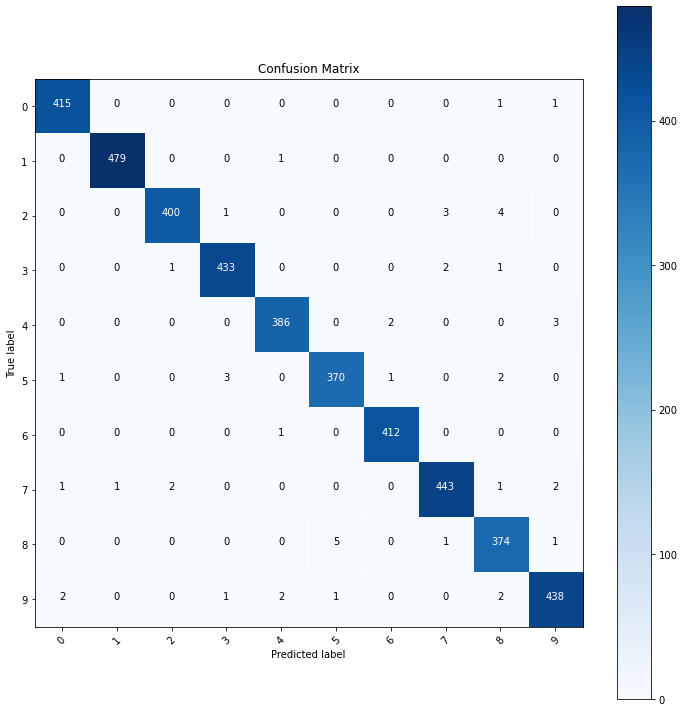

In [18]:
# Vendo alguns reports# Vendo alguns reports
# Usando sklearn
import numpy as np

# Classificando toda base de teste
y_pred = model.predict_classes(x_val)
# voltando pro formato de classes
y_test_c = np.argmax(y_val, axis=1)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Confution Matrix
cm = confusion_matrix(y_test_c, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(y_test_c, y_pred, target_names=target_names))

# Gerando Saída

Qtde de testes: 28000


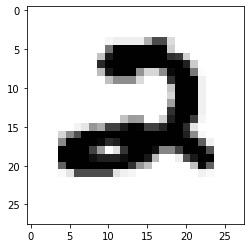

Previsto: 2
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [19]:
# Gerando saída para dataset de teste

#Carrega dataset de teste
test = pd.read_csv("../input/digit-recognizer/test.csv")
print("Qtde de testes: {}".format(len(test)))
# Bota no formato numpy e normaliza
x_test = test.values.reshape(len(test),28,28,1)
x_test = x_test.astype('float32')
x_test /= 255

# Faz classificação para dataset de teste
y_pred = model.predict_classes(x_test)

# Verficando algum exemplo
i = 0
plt.imshow(test.values[i].reshape(28,28), cmap=plt.cm.binary)
plt.show()
print('Previsto: {}'.format(y_pred[i]))

# Botando no formato de saída (competição Kaggle)
results = pd.Series(y_pred,name="Label")
submission = pd.concat([pd.Series(range(1,len(y_pred)+1),name = "ImageId"),results],axis = 1)
print(submission.head(10))
#Salvando Arquivo
submission.to_csv("mlp_mnist_v1.csv",index=False)

# Teste Adicional: Com ruído

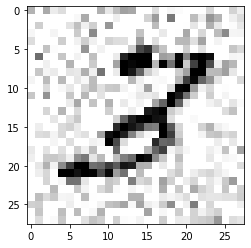

Test loss: 0.15452714928558894
Test accuracy: 0.9704762


In [20]:
#introduzindo ruido
import numpy as np
mean = 0.
stddev = 0.2
noise = np.random.normal(mean, stddev, (4200, 28, 28,1))
x_te = x_val + noise
x_te = np.clip(x_te, 0., 1.)

plt.imshow(x_te.reshape(4200, 28,28)[0], cmap=plt.cm.binary)
plt.show()

# Testa
score = model.evaluate(x_te, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Com ruído, percebemos que a acurácia dos exemplos de validação caiu, mas muito menos que o modelo MLP clássico (ver exemplo de MLP).
Um modelo Convolucional (CNN) captura melhor regiões, ou padrões espaciais de pixels, tornando o modelo mais robusto.